## Assignment 3
#### Injamuri Krutika, M.Tech C.S, 18MCMT20


### Question 1:

#### K Means Clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import SpectralClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [2]:
def k_means_clustering(X, k, y):
    initial_centroids = X[np.random.choice(X.shape[0],k,replace = False)]
    centroids = initial_centroids.copy()
    distance_matrix = np.zeros((centroids.shape[0],X.shape[0]))
    minimum_dist_matrix = np.zeros((centroids.shape[0],X.shape[0]))
    prev_minimum_dist_matrix = np.ones((centroids.shape[0],X.shape[0]))
    iterations = 0
    while(np.array_equal(minimum_dist_matrix, prev_minimum_dist_matrix) == False):
        iterations += 1
        prev_minimum_dist_matrix = np.copy(minimum_dist_matrix)
        minimum_dist_matrix = np.zeros((centroids.shape[0],X.shape[0]))
        distance_matrix = np.zeros((centroids.shape[0],X.shape[0]))
        for i,centroid in enumerate(centroids):
            distance_matrix[i] = np.sqrt(np.sum((X-centroid)**2,axis=1))

        for i,j in enumerate(np.argmin(distance_matrix,axis=0)):
            minimum_dist_matrix[j][i] = 1

        for i in range(k):
            data_points = X[np.where(minimum_dist_matrix[i] == 1)]
            if data_points.size:
                centroids[i] = np.mean(data_points,axis = 0)
                
    print("Total Iterataions: ",iterations)
    return initial_centroids, centroids, np.array([X[minimum_dist_matrix[i] == 1] for i in range(k)]),\
            np.array([y[minimum_dist_matrix[i] == 1] for i in range(k)])

In [3]:
def plot_clusters(clusters, centroids_new,title):
    fig = plt.figure(figsize=(7,7))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(clusters[0][:, 0], clusters[0][:, 1], clusters[0][:, 2], c="r")
    ax.scatter(clusters[1][:, 0], clusters[1][:, 1], clusters[1][:, 2], c="g")
    if clusters.shape[0] == 3:
        ax.scatter(clusters[2][:, 0], clusters[2][:, 1], clusters[2][:, 2], c="b")
    ax.scatter(centroids_new[:, 0], centroids_new[:, 1], centroids_new[:, 2], c="m", marker="x")
    plt.title(title)
    plt.show()

### Iris Dataset

In [4]:
iris_dataset = np.genfromtxt("data/iris.csv",delimiter=",")
iris_dataset = iris_dataset[:,:4]
c1, c2, c3 = [0] * 50, [1] * 50, [2] * 50
y = np.array(c1 + c2 + c3)
pca = PCA(n_components=3)
pca.fit(iris_dataset)
iris_dataset = pca.transform(iris_dataset)
centroids_iris, centroids_new_iris, clusters_iris, y_iris = k_means_clustering(iris_dataset, 3, y)
print("Old Centroids: ",centroids_iris, sep="\n")
print("New Centroids: ",centroids_new_iris, sep="\n")


Total Iterataions:  5
Old Centroids: 
[[ 0.64169028  0.01907118 -0.20417288]
 [ 2.15873837 -0.21832553  0.20842198]
 [-2.50791723 -0.13905634 -0.24711634]]
New Centroids: 
[[ 0.66443351 -0.33029221 -0.03496105]
 [ 2.34645113  0.27235455  0.03802133]
 [-2.64084076  0.19051995  0.01299584]]


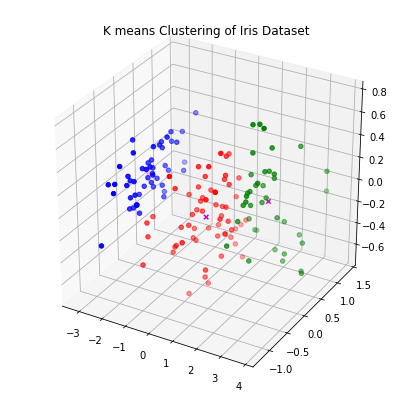

In [5]:
plot_clusters(clusters_iris, centroids_new_iris,"K means Clustering of Iris Dataset")

### Cancer Dataset

In [6]:
file = open('data/arcene_train.data')
X = np.array([list(map(int, file.readline().strip().split(' '))) for _ in range(100)])

file = open('data/arcene_train.labels')
y = np.array([int(file.readline().strip()) for _ in range(100)])

y[y == -1] = 0
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
pca = PCA(n_components=3)
pca.fit(X_std)
X = pca.transform(X_std)
centroids_cancer, centroids_new_cancer, clusters_cancer,y_cancer = k_means_clustering(X, 2, y)
print("Old Centroids: ",centroids_cancer, sep="\n")
print("New Centroids: ",centroids_new_cancer, sep="\n")


/home/user/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Total Iterataions:  3
Old Centroids: 
[[-47.81833473 -28.47816356  -9.04151242]
 [-45.87413972 -13.88996963   8.27672913]]
New Centroids: 
[[-47.36310418 -24.19600541  -0.89612682]
 [ 29.02899934  14.82980977   0.54923902]]


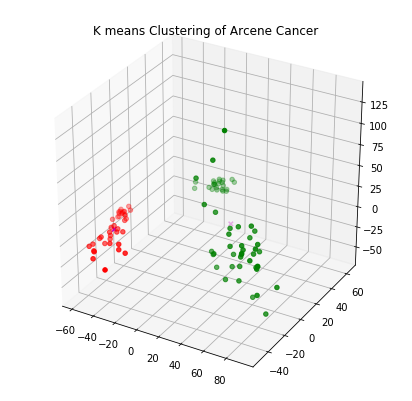

In [7]:
plot_clusters(clusters_cancer, centroids_new_cancer,"K means Clustering of Arcene Cancer")

In [8]:
file = open('data/wine.data')
X = np.array([list(map(float, file.readline().strip().split(','))) for _ in range(178)])
y = X[:,0]
y[y == 1] = 0
y[y == 2] = 1
y[y == 3] = 2

scaler = StandardScaler()
X_std = scaler.fit_transform(X)
pca = PCA(n_components=3)
pca.fit(X_std)
X = pca.transform(X_std)
centroids_wine, centroids_new_wine, clusters_wine,y_wine = k_means_clustering(X, 3, y.astype('uint8'))
print("Old Centroids: ",centroids_wine, sep="\n")
print("New Centroids: ",centroids_new_wine, sep="\n")



Total Iterataions:  6
Old Centroids: 
[[ 2.35241675  0.10013996  0.47225433]
 [-0.8361451   2.21754888  0.14365259]
 [ 0.76457439  2.23750414  0.77226973]]
New Centroids: 
[[ 3.05866503e+00 -1.20826261e+00 -1.77541159e-01]
 [-2.54885890e+00 -9.36610484e-01  1.63163246e-03]
 [ 1.21711421e-01  1.75036892e+00  1.28333665e-01]]


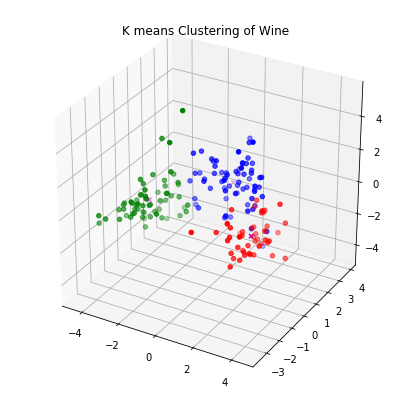

In [19]:
plot_clusters(clusters_wine, centroids_new_wine,"K means Clustering of Wine")

### Internal Measures

- RMSSTD is a measure of homogeneity within clusters
- RS is used to determine whether  there  is  a  significant  difference  among objects in different groups and that objects in the same group have high similarity 

In [10]:
def rmsstd(clusters):
    k = clusters.shape[0]
    ssd = np.zeros(clusters.shape)
    for i in range(k):
        mean = np.mean(clusters[i][0],axis=0)
        ssd[i] = np.sum((clusters[i][0] - mean)**2)
    numerator = np.sum(ssd)
    denominator = 0
    for i in range(k):
        for j in range(clusters[i][0].shape[1]):
            denominator += clusters[i][0].shape[0] - 1
    rmsstd_val = np.sqrt(numerator/denominator)
    return rmsstd_val

def rs(clusters):
    k = clusters.shape[0]
    ssd = np.zeros(clusters.shape)
    total_ssd = np.zeros(clusters.shape)
    
    means = []
    for i in range(k):
        mean = np.mean(clusters[i][0],axis=0)
        ssd[i] = np.sum((clusters[i][0] - mean)**2)
        means.append(list(mean))
    ss_w = np.sum(ssd)
    total_mean = np.mean(means, axis = 0)
    for i in range(k):
        total_ssd[i] = np.sum((clusters[i][0] - total_mean)**2)
    ss_t = np.sum(total_ssd)
    
    rs_val = (ss_t - ss_w) / ss_t
    return rs_val

In [11]:
print("Iris Dataset - RMSSTD: ", rmsstd(clusters_iris.reshape(clusters_iris.shape[0],1)))
print("Iris Dataset - RS: ", rs(clusters_iris.reshape(clusters_iris.shape[0],1)))

Iris Dataset - RMSSTD:  0.41358593819648093
Iris Dataset - RS:  0.8890465062775911


In [12]:
print("Cancer Dataset - RMSSTD: ", rmsstd(clusters_cancer.reshape(clusters_cancer.shape[0],1)))
print("Cancer Dataset - RS: ", rs(clusters_cancer.reshape(clusters_cancer.shape[0],1)))
    

Cancer Dataset - RMSSTD:  26.910850280334664
Cancer Dataset - RS:  0.4636066133525181


In [13]:
print("Wine Dataset - RMSSTD: ", rmsstd(clusters_wine.reshape(clusters_wine.shape[0],1)))
print("Wine Dataset - RS: ", rs(clusters_wine.reshape(clusters_wine.shape[0],1)))
    

Wine Dataset - RMSSTD:  0.9673041289768947
Wine Dataset - RS:  0.7107498974613461


### External Measures
- Purity


In [14]:
 def confusion_matrix(k, labels):
        cm = np.zeros((k, k), int)
        number_of_datapoints = np.sum([labels[i].size for i in range(k)])
        for i in range(k):
            counts = np.bincount(labels[i])
            target = np.argmax(counts)
            for label in labels[i]:
                cm[label, int(target)] += 1
        return cm

def precision(TP, FP):
    return np.around((TP/(TP+FP)),decimals=3)

def recall(TP, FN):
    return np.around((TP/(TP+FN)),decimals=3)


def f_measure(TP, FP, FN):
    precision_val = precision(TP, FP)
    recall_val = recall(TP, FN)
    return 2 * (precision_val * recall_val) / (precision_val + recall_val)

def cm_metrics(cm):
    FP, FN, TN = [], [], []
    for i in range(cm.shape[0]):
        FP.append(sum(cm[:,i]) - cm[i,i])
        FN.append(sum(cm[i,:]) - cm[i,i])
        temp = np.delete(cm, i, 0)   # delete ith row
        temp = np.delete(temp, i, 1)  # delete ith column
        TN.append(sum(sum(temp)))
    return np.diag(cm),FP, FN, TN


          
def purity(y, k, class_count):
    sum = 0
    for i in range(k):
        counts = np.bincount(y[i])
        label = np.argmax(counts)
        max_occurances = counts[label]
        sum += min(class_count[i], max_occurances)
    return sum / np.sum(class_count)




In [15]:
cm = confusion_matrix(3, y_iris)
print("Confusion Matrix: ",cm,sep="\n")
tp, fp, fn, tn = cm_metrics(cm)
f_m = f_measure(tp, fp, fn)
print("Purity: ", purity(y_iris, 3, [50,50,50]))
print("F-Measure: ", f_m)
print("Average F-Measure: ", np.mean(f_m))


Confusion Matrix: 
[[50  0  0]
 [ 0 47  3]
 [ 0 14 36]]
Purity:  0.8866666666666667
F-Measure:  [1.         0.84654971 0.80895922]
Average F-Measure:  0.8851696428465496


In [16]:
cm = confusion_matrix(2, y_cancer)
print("Confusion Matrix: ",cm,sep="\n")
tp, fp, fn, tn = cm_metrics(cm)
f_m = f_measure(tp, fp, fn)
print("Purity: ", purity(y_cancer, 2, [44,56]))
print("F-Measure: ", f_m)
print("Average F-Measure: ", np.mean(f_m))

Confusion Matrix: 
[[40 16]
 [22 22]]
Purity:  0.62
F-Measure:  [0.67774834 0.53660797]
Average F-Measure:  0.6071781573568855


In [17]:
cm = confusion_matrix(3, y_wine)
print("Confusion Matrix: ",cm,sep="\n")
tp, fp, fn, tn = cm_metrics(cm)
f_m = f_measure(tp, fp, fn)
print("Purity: ", purity(y_wine, 3, [59,71, 48]))
print("F-Measure: ", f_m)
print("Average F-Measure: ", np.mean(f_m))

Confusion Matrix: 
[[59  0  0]
 [ 3 67  1]
 [ 0  0 48]]
Purity:  0.8707865168539326
F-Measure:  [0.97540984 0.97119342 0.98989899]
Average F-Measure:  0.9788340805341412


### Kernel K Means

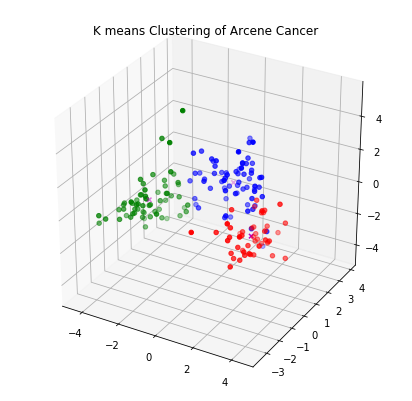

In [18]:
k = 3
clustering = SpectralClustering(n_clusters=k,assign_labels="discretize",random_state=0).fit_predict(X)
# clustering = SpectralClustering(n_clusters=k,assign_labels="discretize",random_state=0).fit_predict(iris_dataset[:100,:])

clusters = np.array([X[clustering == i] for i in range(k)])
centroids_new = np.array([np.mean(clusters[i],axis=0) for i in range(k)])
plot_clusters(clusters, centroids_new,"K means Clustering of Arcene Cancer")